In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
categories = ['comp.sys.mac.hardware', 'rec.autos', 'sci.electronics', 'talk.politics.guns']
data = fetch_20newsgroups(categories=categories)
xTrain, xTest, yTrain, yTest = train_test_split(data.data, data.target, test_size = 0.3)
print(f'rawdata: {len(data.data)}')
print(f'xTrain: {len(xTrain)} yTrain: {len(yTrain)}')
print(f'xTest: {len(xTest)} yTrain: {len(yTest)}')
data.target_names

rawdata: 2309
xTrain: 1616 yTrain: 1616
xTest: 693 yTrain: 693


['comp.sys.mac.hardware', 'rec.autos', 'sci.electronics', 'talk.politics.guns']

In [ ]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(xTrain, yTrain)
labels = model.predict(xTest)

In [ ]:
n = len(yTest)
corrects = [ 1 for i in range(n) if yTest[i] == labels[i] ]
print(f'corrects: {sum(corrects)} from {n}')
print(f'accuracy: {round(sum(corrects)*100/n, 2)} %')

corrects: 642 from 693
accuracy: 92.64 %


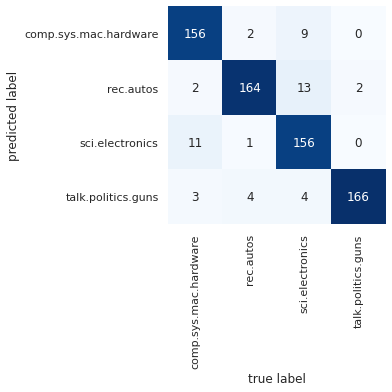

In [ ]:
mat = confusion_matrix(yTest, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
def predict_category(testStr, model=model):
    pred = model.predict([testStr])[0]
    return f'ตอบ {categories[pred]}'

In [ ]:
predict_category('I go to Apple Store to buy my new Macbook')

'ตอบ comp.sys.mac.hardware'

In [ ]:
predict_category('My Brother, He has AK47 in his house?? Becareful')

'ตอบ talk.politics.guns'

In [ ]:
predict_category('Can you switch the light on?')

'ตอบ sci.electronics'